In [1]:
import json
import numpy as np
import pandas as pd
import re
from copy import copy
from itertools import chain

import matplotlib.pyplot as plt

In [2]:
with open('hands.json', 'r') as file:
    data = json.load(file)

In [3]:
len(data)

439682

In [4]:
first_obj = data[0]

In [5]:
first_obj

{'_id': 'holdem3_199505_800160769',
 'board': [],
 'dealer': 1,
 'game': 'holdem3',
 'hand_num': 1,
 'num_players': 2,
 'players': {'A8': {'total_bet': 25,
   'bankroll': 8371,
   'bets': [{'actions': 'Bf', 'stage': 'p'},
    {'actions': '-', 'stage': 'f'},
    {'actions': '-', 'stage': 't'},
    {'actions': '-', 'stage': 'r'}],
   'pocket_cards': [],
   'position': 1,
   'total_win': 0},
  'Schween': {'total_bet': 50,
   'bankroll': 8035,
   'bets': [{'actions': 'B', 'stage': 'p'},
    {'actions': '-', 'stage': 'f'},
    {'actions': '-', 'stage': 't'},
    {'actions': '-', 'stage': 'r'}],
   'pocket_cards': [],
   'position': 2,
   'total_win': 75}},
 'pots': [{'num_players': 0, 'stage': 'f', 'size': 0},
  {'num_players': 0, 'stage': 't', 'size': 0},
  {'num_players': 0, 'stage': 'r', 'size': 0},
  {'num_players': 1, 'stage': 's', 'size': 75}]}

In [6]:
first_obj['_id']

'holdem3_199505_800160769'

In [7]:
first_obj['_id'].split('_')

['holdem3', '199505', '800160769']

In [8]:
_, year_month, timestamp = first_obj['_id'].split('_')

In [9]:
year_month, timestamp

('199505', '800160769')

In [10]:
year_month[:4], year_month[4:] 

('1995', '05')

In [11]:
def extract_date(obj: dict, id_str: str):
    _, year_month, timestamp = obj[id_str].split('_')
    return year_month[:4], year_month[4:], timestamp

In [12]:
second_obj = data[1]

In [13]:
second_obj

{'_id': 'holdem3_199505_800160788',
 'board': ['Jc', 'Qs', '6s', '6d'],
 'dealer': 1,
 'game': 'holdem3',
 'hand_num': 2,
 'num_players': 2,
 'players': {'A8': {'total_bet': 250,
   'bankroll': 8346,
   'bets': [{'actions': 'Br', 'stage': 'p'},
    {'actions': 'b', 'stage': 'f'},
    {'actions': 'bf', 'stage': 't'},
    {'actions': '-', 'stage': 'r'}],
   'pocket_cards': [],
   'position': 2,
   'total_win': 0},
  'Schween': {'total_bet': 350,
   'bankroll': 8060,
   'bets': [{'actions': 'Bcc', 'stage': 'p'},
    {'actions': 'kc', 'stage': 'f'},
    {'actions': 'kr', 'stage': 't'},
    {'actions': '-', 'stage': 'r'}],
   'pocket_cards': [],
   'position': 1,
   'total_win': 600}},
 'pots': [{'num_players': 2, 'stage': 'f', 'size': 200},
  {'num_players': 2, 'stage': 't', 'size': 300},
  {'num_players': 0, 'stage': 'r', 'size': 0},
  {'num_players': 1, 'stage': 's', 'size': 600}]}

In [14]:
board_cards = second_obj['board']
pocket_cards = {player_name: player_data["pocket_cards"] for player_name, player_data in second_obj['players'].items()}

In [15]:
board_cards, pocket_cards

(['Jc', 'Qs', '6s', '6d'], {'A8': [], 'Schween': []})

In [16]:
def normalize_cards_list(board: list, cards_num=5, padding_element='-'):
    normalize_board = copy(board)
    cards_number = len(board)
    if cards_number == cards_num:
        return normalize_board
    else:
        appendex_number = cards_num - cards_number
        appendex = [padding_element] * appendex_number
        normalize_board.extend(appendex)
    return normalize_board

In [17]:
normalize_cards_list(board_cards, padding_element=None)

['Jc', 'Qs', '6s', '6d', None]

In [18]:
normalize_cards_list([], cards_num=2, padding_element=None)

[None, None]

In [19]:
players = first_obj['players']

In [20]:
for player in list(players.values()):
    player_label = f"player{player['position']}"
    print(player_label)

player1
player2


In [21]:
for player in list(players.values()):
    player_label = f"player{player['position']}"
    print(f"--------- {player_label} ---------")

    for bet in player['bets']:
        bet_label = f"{player_label}_bet_{bet['stage']}"
        print(f"{bet_label}: {bet['actions']}")

--------- player1 ---------
player1_bet_p: Bf
player1_bet_f: -
player1_bet_t: -
player1_bet_r: -
--------- player2 ---------
player2_bet_p: B
player2_bet_f: -
player2_bet_t: -
player2_bet_r: -


In [22]:
second_obj

{'_id': 'holdem3_199505_800160788',
 'board': ['Jc', 'Qs', '6s', '6d'],
 'dealer': 1,
 'game': 'holdem3',
 'hand_num': 2,
 'num_players': 2,
 'players': {'A8': {'total_bet': 250,
   'bankroll': 8346,
   'bets': [{'actions': 'Br', 'stage': 'p'},
    {'actions': 'b', 'stage': 'f'},
    {'actions': 'bf', 'stage': 't'},
    {'actions': '-', 'stage': 'r'}],
   'pocket_cards': [],
   'position': 2,
   'total_win': 0},
  'Schween': {'total_bet': 350,
   'bankroll': 8060,
   'bets': [{'actions': 'Bcc', 'stage': 'p'},
    {'actions': 'kc', 'stage': 'f'},
    {'actions': 'kr', 'stage': 't'},
    {'actions': '-', 'stage': 'r'}],
   'pocket_cards': [],
   'position': 1,
   'total_win': 600}},
 'pots': [{'num_players': 2, 'stage': 'f', 'size': 200},
  {'num_players': 2, 'stage': 't', 'size': 300},
  {'num_players': 0, 'stage': 'r', 'size': 0},
  {'num_players': 1, 'stage': 's', 'size': 600}]}

In [23]:
for pot in second_obj['pots']:
    pot_size_label = f"pot_size_{pot['stage']}"
    pot_players_num_label = f"pot_players_num_{pot['stage']}"
    print(f"{pot_size_label}: {pot['size']}")
    print(f"{pot_players_num_label}: {pot['num_players']}")
    print('-'*20)

pot_size_f: 200
pot_players_num_f: 2
--------------------
pot_size_t: 300
pot_players_num_t: 2
--------------------
pot_size_r: 0
pot_players_num_r: 0
--------------------
pot_size_s: 600
pot_players_num_s: 1
--------------------


In [24]:
for player in list(players.values()):
    player_label = f"player{player['position']}"
    print(len(player['pocket_cards']))
    print(f"{player_label}: {normalize_cards_list(player['pocket_cards'], cards_num=2)}")

0
player1: ['-', '-']
0
player2: ['-', '-']


In [25]:
stages = {
    "p": "preflop",
    "f": "flop",
    "t": "turn",
    "r": "river",
    "s": "showdown"
}

In [26]:
def process_bets(player_label:str, bets_list:list[dict], stages:dict):
    bets_ = {}
    for bet in bets_list:
        stage_verbose_name = stages[bet['stage']]
        bets_[f"{player_label}_bet_{stage_verbose_name}"] = bet['actions']
    return bets_

In [27]:
def process_players(player_label: str, player_object: dict, stages:dict):
    bets = process_bets(player_label, player_object['bets'], stages)
    result = {
        f"{player_label}_total_bet": player_object['total_bet'],
        f"{player_label}_bankroll": player_object['bankroll'],
        f"{player_label}_total_win": player_object['total_win']
    }
    
    result.update(bets)
    
    return result

In [28]:
process_players(*list(second_obj['players'].items())[0], stages)

{'A8_total_bet': 250,
 'A8_bankroll': 8346,
 'A8_total_win': 0,
 'A8_bet_preflop': 'Br',
 'A8_bet_flop': 'b',
 'A8_bet_turn': 'bf',
 'A8_bet_river': '-'}

In [29]:
def process_pots(pots_list:list[dict], sstages:dict):
    result = {}
    for pot in pots_list:
        stage_verbose_name = stages[pot['stage']]
        result[f"pot_players_num_{stage_verbose_name}"] = pot['num_players'] 
        result[f"pot_size_{stage_verbose_name}"] = pot['size']
    return result

In [30]:
process_pots(second_obj['pots'], stages)

{'pot_players_num_flop': 2,
 'pot_size_flop': 200,
 'pot_players_num_turn': 2,
 'pot_size_turn': 300,
 'pot_players_num_river': 0,
 'pot_size_river': 0,
 'pot_players_num_showdown': 1,
 'pot_size_showdown': 600}

In [31]:
def process_pocket_cards(player_label: str, cards: list):
    return {f"{player_label}_pocket_card{i+1}": card for i, card in enumerate(cards)}

In [32]:
def holdem_version_extractor(game_name:str):
    match = re.search(r"holdem(\d+)", game_name)
    game_version = int(match.group(1)) if match else 0
    return game_version

In [33]:
def process_row(dict_row, stages:dict):
    result = {
        "game_id": holdem_version_extractor(dict_row["game"]),
        "dealer_id": dict_row["dealer"],
        "players_num": dict_row["num_players"]
    }
    year, month, timestamp = extract_date(dict_row, '_id')
    result["year"], result["month"], result["timestamp"] = year, month, timestamp
    board = normalize_cards_list(dict_row['board'], cards_num=5)
    for i, card in enumerate(board):
        result[f"board_card_{i+1}"] = card
    for player_name, player_info in dict_row["players"].items():
        pocket_cards = player_info["pocket_cards"]
        normalized_pocket_cards = normalize_cards_list(pocket_cards, cards_num=2)
        player_label = f"player{player_info['position']}"
        processed_player = process_players(player_label, player_info, stages)
        processed_player.update(process_pocket_cards(player_label, normalized_pocket_cards))
        result.update(processed_player)
        result[f"player{player_info['position']}_name"] = player_name
    pots = process_pots(dict_row['pots'], stages)
    result.update(pots)
    return result

In [34]:
print(process_row(second_obj, stages))

{'game_id': 3, 'dealer_id': 1, 'players_num': 2, 'year': '1995', 'month': '05', 'timestamp': '800160788', 'board_card_1': 'Jc', 'board_card_2': 'Qs', 'board_card_3': '6s', 'board_card_4': '6d', 'board_card_5': '-', 'player2_total_bet': 250, 'player2_bankroll': 8346, 'player2_total_win': 0, 'player2_bet_preflop': 'Br', 'player2_bet_flop': 'b', 'player2_bet_turn': 'bf', 'player2_bet_river': '-', 'player2_pocket_card1': '-', 'player2_pocket_card2': '-', 'player2_name': 'A8', 'player1_total_bet': 350, 'player1_bankroll': 8060, 'player1_total_win': 600, 'player1_bet_preflop': 'Bcc', 'player1_bet_flop': 'kc', 'player1_bet_turn': 'kr', 'player1_bet_river': '-', 'player1_pocket_card1': '-', 'player1_pocket_card2': '-', 'player1_name': 'Schween', 'pot_players_num_flop': 2, 'pot_size_flop': 200, 'pot_players_num_turn': 2, 'pot_size_turn': 300, 'pot_players_num_river': 0, 'pot_size_river': 0, 'pot_players_num_showdown': 1, 'pot_size_showdown': 600}


In [47]:
import concurrent.futures as cf

In [48]:
def process_wrapper(args):
    row, stages = args
    return process_row(row, stages)
    
def process_data(data_list, stages):
    processed_rows = []
    with cf.ProcessPoolExecutor() as executor:
        results = executor.map(process_wrapper, [(row, stages) for row in data_list])
        processed_rows = list(results)
    return processed_rows

In [ ]:
processed_data = process_data(data, stages)

In [42]:
# processed_data = [process_row(row, stages) for row in data]

In [43]:
processed_data[1:3]

[{'game_id': 3,
  'dealer_id': 1,
  'players_num': 2,
  'year': '1995',
  'month': '05',
  'timestamp': '800160788',
  'board_card_1': 'Jc',
  'board_card_2': 'Qs',
  'board_card_3': '6s',
  'board_card_4': '6d',
  'board_card_5': '-',
  'player2_total_bet': 250,
  'player2_bankroll': 8346,
  'player2_total_win': 0,
  'player2_bet_preflop': 'Br',
  'player2_bet_flop': 'b',
  'player2_bet_turn': 'bf',
  'player2_bet_river': '-',
  'player2_pocket_card1': '-',
  'player2_pocket_card2': '-',
  'player2_name': 'A8',
  'player1_total_bet': 350,
  'player1_bankroll': 8060,
  'player1_total_win': 600,
  'player1_bet_preflop': 'Bcc',
  'player1_bet_flop': 'kc',
  'player1_bet_turn': 'kr',
  'player1_bet_river': '-',
  'player1_pocket_card1': '-',
  'player1_pocket_card2': '-',
  'player1_name': 'Schween',
  'pot_players_num_flop': 2,
  'pot_size_flop': 200,
  'pot_players_num_turn': 2,
  'pot_size_turn': 300,
  'pot_players_num_river': 0,
  'pot_size_river': 0,
  'pot_players_num_showdown': 1,

In [44]:
df = pd.DataFrame(processed_data)

In [45]:
pd.set_option('display.max_columns', None)

In [46]:
df.head()

,game_id,dealer_id,players_num,year,month,timestamp,board_card_1,board_card_2,board_card_3,board_card_4,board_card_5,player1_total_bet,player1_bankroll,player1_total_win,player1_bet_preflop,player1_bet_flop,player1_bet_turn,player1_bet_river,player1_pocket_card1,player1_pocket_card2,player1_name,player2_total_bet,player2_bankroll,player2_total_win,player2_bet_preflop,player2_bet_flop,player2_bet_turn,player2_bet_river,player2_pocket_card1,player2_pocket_card2,player2_name,pot_players_num_flop,pot_size_flop,pot_players_num_turn,pot_size_turn,pot_players_num_river,pot_size_river,pot_players_num_showdown,pot_size_showdown,player3_total_bet,player3_bankroll,player3_total_win,player3_bet_preflop,player3_bet_flop,player3_bet_turn,player3_bet_river,player3_pocket_card1,player3_pocket_card2,player3_name,player4_total_bet,player4_bankroll,player4_total_win,player4_bet_preflop,player4_bet_flop,player4_bet_turn,player4_bet_river,player4_pocket_card1,player4_pocket_card2,player4_name,player5_total_bet,player5_bankroll,player5_total_win,player5_bet_preflop,player5_bet_flop,player5_bet_turn,player5_bet_river,player5_pocket_card1,player5_pocket_card2,player5_name,player6_total_bet,player6_bankroll,player6_total_win,player6_bet_preflop,player6_bet_flop,player6_bet_turn,player6_bet_river,player6_pocket_card1,player6_pocket_card2,player6_name,player7_total_bet,player7_bankroll,player7_total_win,player7_bet_preflop,player7_bet_flop,player7_bet_turn,player7_bet_river,player7_pocket_card1,player7_pocket_card2,player7_name,player8_total_bet,player8_bankroll,player8_total_win,player8_bet_preflop,player8_bet_flop,player8_bet_turn,player8_bet_river,player8_pocket_card1,player8_pocket_card2,player8_name,player9_total_bet,player9_bankroll,player9_total_win,player9_bet_preflop,player9_bet_flop,player9_bet_turn,player9_bet_river,player9_pocket_card1,player9_pocket_card2,player9_name,player10_total_bet,player10_bankroll,player10_total_win,player10_bet_preflop,player10_bet_flop,player10_bet_turn,player10_bet_river,player10_pocket_card1,player10_pocket_card2,player10_name,player11_total_bet,player11_bankroll,player11_total_win,player11_bet_preflop,player11_bet_flop,player11_bet_turn,player11_bet_river,player11_pocket_card1,player11_pocket_card2,player11_name,player12_total_bet,player12_bankroll,player12_total_win,player12_bet_preflop,player12_bet_flop,player12_bet_turn,player12_bet_river,player12_pocket_card1,player12_pocket_card2,player12_name
0,3,1,2,1995,05,800160769,-,-,-,-,-,25,8371,0,Bf,-,-,-,-,-,A8,50,8035,75,B,-,-,-,-,-,Schween,0,0,0,0,0,0,1,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,1,2,1995,05,800160788,Jc,Qs,6s,6d,-,350,8060,600,Bcc,kc,kr,-,-,-,Schween,250,8346,0,Br,b,bf,-,-,-,A8,2,200,2,300,0,0,1,600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,2,1995,05,800160827,9h,7s,Qc,-,-,150,8096,250,Br,b,-,-,-,-,A8,100,8310,0,Bc,f,-,-,-,-,Schween,2,200,0,0,0,0,1,250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [40]:
df.columns.values

array(['game_id', 'dealer_id', 'players_num', 'year', 'month',
       'timestamp', 'board_card_1', 'board_card_2', 'board_card_3',
       'board_card_4', 'board_card_5', 'player1_total_bet',
       'player1_bankroll', 'player1_total_win', 'player1_bet_preflop',
       'player1_bet_flop', 'player1_bet_turn', 'player1_bet_river',
       'player1_pocket_card1', 'player1_pocket_card2', 'player1_name',
       'player2_total_bet', 'player2_bankroll', 'player2_total_win',
       'player2_bet_preflop', 'player2_bet_flop', 'player2_bet_turn',
       'player2_bet_river', 'player2_pocket_card1',
       'player2_pocket_card2', 'player2_name', 'pot_players_num_flop',
       'pot_size_flop', 'pot_players_num_turn', 'pot_size_turn',
       'pot_players_num_river', 'pot_size_river',
       'pot_players_num_showdown', 'pot_size_showdown',
       'player3_total_bet', 'player3_bankroll', 'player3_total_win',
       'player3_bet_preflop', 'player3_bet_flop', 'player3_bet_turn',
       'player3_bet_river',

In [41]:
df.shape

(439682, 139)

In [42]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439682 entries, 0 to 439681
Data columns (total 139 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    game_id                   int64  
 1    dealer_id                 int64  
 2    players_num               int64  
 3    year                      object 
 4    month                     object 
 5    timestamp                 object 
 6    board_card_1              object 
 7    board_card_2              object 
 8    board_card_3              object 
 9    board_card_4              object 
 10   board_card_5              object 
 11   player1_total_bet         int64  
 12   player1_bankroll          int64  
 13   player1_total_win         int64  
 14   player1_bet_preflop       object 
 15   player1_bet_flop          object 
 16   player1_bet_turn          object 
 17   player1_bet_river         object 
 18   player1_pocket_card1      object 
 19   player1_pocket_card2      object 
 20   pl

In [43]:
df.columns

Index(['game_id', 'dealer_id', 'players_num', 'year', 'month', 'timestamp',
       'board_card_1', 'board_card_2', 'board_card_3', 'board_card_4',
       ...
       'player12_total_bet', 'player12_bankroll', 'player12_total_win',
       'player12_bet_preflop', 'player12_bet_flop', 'player12_bet_turn',
       'player12_bet_river', 'player12_pocket_card1', 'player12_pocket_card2',
       'player12_name'],
      dtype='object', length=139)

In [44]:
bets_ratio_by_players = (
    df.
    filter(regex='player\\d+_total_bet').
    isnull().sum().to_frame().
    rename(columns={0: "missing_count"}).
    assign(data_count = lambda df_: df.shape[0] - df_.missing_count).
    assign(missing_ratio = lambda df_: round(df_.missing_count/df.shape[0], 3))
)

In [45]:
bets_ratio_by_players

,missing_count,data_count,missing_ratio
player1_total_bet,0,439682,0.000
player2_total_bet,0,439682,0.000
player3_total_bet,207279,232403,0.471
player4_total_bet,312658,127024,0.711
player5_total_bet,367543,72139,0.836
player6_total_bet,397983,41699,0.905
player7_total_bet,416035,23647,0.946
player8_total_bet,427030,12652,0.971
player9_total_bet,433701,5981,0.986
player10_total_bet,437173,2509,0.994


In [112]:
df.to_csv('data/holdem3.csv', index=False)

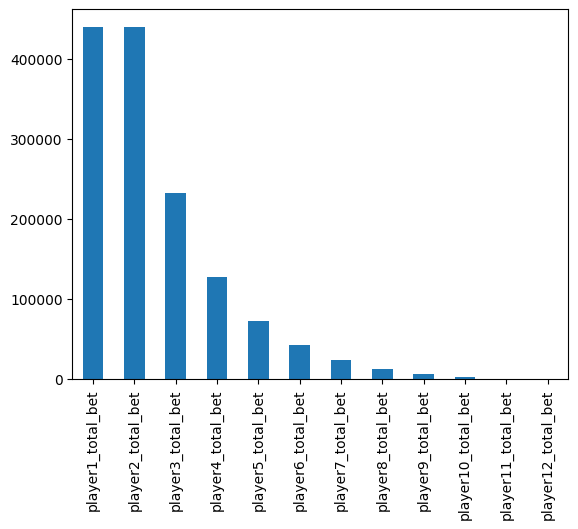

In [47]:
plot = bets_ratio_by_players["data_count"].plot(kind='bar')
plot
plt.show()

In [48]:
pattern = r"player\d+.+|board_card_\d+"
filtered_df = df.filter(regex=pattern)
filtered_df

,board_card_1,board_card_2,board_card_3,board_card_4,board_card_5,player1_total_bet,player1_bankroll,player1_total_win,player1_bet_preflop,player1_bet_flop,player1_bet_turn,player1_bet_river,player1_pocket_card1,player1_pocket_card2,player1_name,player2_total_bet,player2_bankroll,player2_total_win,player2_bet_preflop,player2_bet_flop,player2_bet_turn,player2_bet_river,player2_pocket_card1,player2_pocket_card2,player2_name,player3_total_bet,player3_bankroll,player3_total_win,player3_bet_preflop,player3_bet_flop,player3_bet_turn,player3_bet_river,player3_pocket_card1,player3_pocket_card2,player3_name,player4_total_bet,player4_bankroll,player4_total_win,player4_bet_preflop,player4_bet_flop,player4_bet_turn,player4_bet_river,player4_pocket_card1,player4_pocket_card2,player4_name,player5_total_bet,player5_bankroll,player5_total_win,player5_bet_preflop,player5_bet_flop,player5_bet_turn,player5_bet_river,player5_pocket_card1,player5_pocket_card2,player5_name,player6_total_bet,player6_bankroll,player6_total_win,player6_bet_preflop,player6_bet_flop,player6_bet_turn,player6_bet_river,player6_pocket_card1,player6_pocket_card2,player6_name,player7_total_bet,player7_bankroll,player7_total_win,player7_bet_preflop,player7_bet_flop,player7_bet_turn,player7_bet_river,player7_pocket_card1,player7_pocket_card2,player7_name,player8_total_bet,player8_bankroll,player8_total_win,player8_bet_preflop,player8_bet_flop,player8_bet_turn,player8_bet_river,player8_pocket_card1,player8_pocket_card2,player8_name,player9_total_bet,player9_bankroll,player9_total_win,player9_bet_preflop,player9_bet_flop,player9_bet_turn,player9_bet_river,player9_pocket_card1,player9_pocket_card2,player9_name,player10_total_bet,player10_bankroll,player10_total_win,player10_bet_preflop,player10_bet_flop,player10_bet_turn,player10_bet_river,player10_pocket_card1,player10_pocket_card2,player10_name,player11_total_bet,player11_bankroll,player11_total_win,player11_bet_preflop,player11_bet_flop,player11_bet_turn,player11_bet_river,player11_pocket_card1,player11_pocket_card2,player11_name,player12_total_bet,player12_bankroll,player12_total_win,player12_bet_preflop,player12_bet_flop,player12_bet_turn,player12_bet_river,player12_pocket_card1,player12_pocket_card2,player12_name
0,-,-,-,-,-,25,8371,0,Bf,-,-,-,-,-,A8,50,8035,75,B,-,-,-,-,-,Schween,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Jc,Qs,6s,6d,-,350,8060,600,Bcc,kc,kr,-,-,-,Schween,250,8346,0,Br,b,bf,-,-,-,A8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9h,7s,Qc,-,-,150,8096,250,Br,b,-,-,-,-,A8,100,8310,0,Bc,f,-,-,-,-,Schween,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Qh,6s,3s,-,-,150,8210,0,Brc,kf,-,-,-,-,Schween,200,8196,350,Br,b,-,-,-,-,A8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [49]:
df[df.players_num == 2]

,game_id,dealer_id,players_num,year,month,timestamp,board_card_1,board_card_2,board_card_3,board_card_4,board_card_5,player1_total_bet,player1_bankroll,player1_total_win,player1_bet_preflop,player1_bet_flop,player1_bet_turn,player1_bet_river,player1_pocket_card1,player1_pocket_card2,player1_name,player2_total_bet,player2_bankroll,player2_total_win,player2_bet_preflop,player2_bet_flop,player2_bet_turn,player2_bet_river,player2_pocket_card1,player2_pocket_card2,player2_name,pot_players_num_flop,pot_size_flop,pot_players_num_turn,pot_size_turn,pot_players_num_river,pot_size_river,pot_players_num_showdown,pot_size_showdown,player3_total_bet,player3_bankroll,player3_total_win,player3_bet_preflop,player3_bet_flop,player3_bet_turn,player3_bet_river,player3_pocket_card1,player3_pocket_card2,player3_name,player4_total_bet,player4_bankroll,player4_total_win,player4_bet_preflop,player4_bet_flop,player4_bet_turn,player4_bet_river,player4_pocket_card1,player4_pocket_card2,player4_name,player5_total_bet,player5_bankroll,player5_total_win,player5_bet_preflop,player5_bet_flop,player5_bet_turn,player5_bet_river,player5_pocket_card1,player5_pocket_card2,player5_name,player6_total_bet,player6_bankroll,player6_total_win,player6_bet_preflop,player6_bet_flop,player6_bet_turn,player6_bet_river,player6_pocket_card1,player6_pocket_card2,player6_name,player7_total_bet,player7_bankroll,player7_total_win,player7_bet_preflop,player7_bet_flop,player7_bet_turn,player7_bet_river,player7_pocket_card1,player7_pocket_card2,player7_name,player8_total_bet,player8_bankroll,player8_total_win,player8_bet_preflop,player8_bet_flop,player8_bet_turn,player8_bet_river,player8_pocket_card1,player8_pocket_card2,player8_name,player9_total_bet,player9_bankroll,player9_total_win,player9_bet_preflop,player9_bet_flop,player9_bet_turn,player9_bet_river,player9_pocket_card1,player9_pocket_card2,player9_name,player10_total_bet,player10_bankroll,player10_total_win,player10_bet_preflop,player10_bet_flop,player10_bet_turn,player10_bet_river,player10_pocket_card1,player10_pocket_card2,player10_name,player11_total_bet,player11_bankroll,player11_total_win,player11_bet_preflop,player11_bet_flop,player11_bet_turn,player11_bet_river,player11_pocket_card1,player11_pocket_card2,player11_name,player12_total_bet,player12_bankroll,player12_total_win,player12_bet_preflop,player12_bet_flop,player12_bet_turn,player12_bet_river,player12_pocket_card1,player12_pocket_card2,player12_name
0,3,1,2,1995,05,800160769,-,-,-,-,-,25,8371,0,Bf,-,-,-,-,-,A8,50,8035,75,B,-,-,-,-,-,Schween,0,0,0,0,0,0,1,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,1,2,1995,05,800160788,Jc,Qs,6s,6d,-,350,8060,600,Bcc,kc,kr,-,-,-,Schween,250,8346,0,Br,b,bf,-,-,-,A8,2,200,2,300,0,0,1,600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,2,1995,05,800160827,9h,7s,Qc,-,-,150,8096,250,Br,b,-,-,-,-,A8,100,8310,0,Bc,f,-,-,-,-,Schween,2,200,0,0,0,0,1,250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [50]:
def extract_cols_based_on_players_num(df:pd.DataFrame, players_num:int):
    target_df = df[df.players_num == players_num]
    columns_to_drop = [
    col for col in df.columns 
    if (
        (match := re.search(r"(player(\d+).+)", col)) 
        and 
        any(int(num) > players_num for num in match.groups() if num and num.isdigit())
    )
    ]
    return target_df.drop(columns=columns_to_drop)

In [51]:
df_players_2 = extract_cols_based_on_players_num(df, 2)
pd.set_option('display.max_columns', None)
df_players_2

,game_id,dealer_id,players_num,year,month,timestamp,board_card_1,board_card_2,board_card_3,board_card_4,board_card_5,player1_total_bet,player1_bankroll,player1_total_win,player1_bet_preflop,player1_bet_flop,player1_bet_turn,player1_bet_river,player1_pocket_card1,player1_pocket_card2,player1_name,player2_total_bet,player2_bankroll,player2_total_win,player2_bet_preflop,player2_bet_flop,player2_bet_turn,player2_bet_river,player2_pocket_card1,player2_pocket_card2,player2_name,pot_players_num_flop,pot_size_flop,pot_players_num_turn,pot_size_turn,pot_players_num_river,pot_size_river,pot_players_num_showdown,pot_size_showdown
0,3,1,2,1995,05,800160769,-,-,-,-,-,25,8371,0,Bf,-,-,-,-,-,A8,50,8035,75,B,-,-,-,-,-,Schween,0,0,0,0,0,0,1,75
1,3,1,2,1995,05,800160788,Jc,Qs,6s,6d,-,350,8060,600,Bcc,kc,kr,-,-,-,Schween,250,8346,0,Br,b,bf,-,-,-,A8,2,200,2,300,0,0,1,600
2,3,1,2,1995,05,800160827,9h,7s,Qc,-,-,150,8096,250,Br,b,-,-,-,-,A8,100,8310,0,Bc,f,-,-,-,-,Schween,2,200,0,0,0,0,1,250
3,3,1,2,1995,05,800160846,Qh,6s,3s,-,-,150,8210,0,Brc,kf,-,-,-,-,Schween,200,8196,350,Br,b,-,-,-,-,A8,2,300,0,0,0,0,1,350
4,3,1,2,1995,05,800160880,As,3c,6s,-,-,250,8346,450,Br,br,-,-,-,-,A8,200,8060,0,Bc,rf,-,-,-,-,Schween,2,200,0,0,0,0,1,450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439677,3,1,2,2001,08,998722150,-,-,-,-,-,25,6115,75,B,-,-,-,-,-,fatpat55,50,8445,0,BQ,-,-,-,-,-,zeigen,0,0,0,0,0,0,1,75
439678,3,1,2,2001,08,998733998,4h,Ts,2h,Qc,2d,2050,5846,0,Brc,k,k,brrrrrrrrr,3c,8s,fatpat55,2050,9340,4100,Br,k,k,rrrrrrrrrc,Qh,8c,rivrgod,2,300,2,300,2,300,2,4100
439679,3,1,2,2001,08,998734040,4d,3h,5d,5h,7c,350,11390,600,Bc,k,k,br,-,-,rivrgod,250,3796,0,Bk,k,k,rf,-,-,fatpat55,2,100,2,100,2,100,1,600
439680,3,1,2,2001,08,998734063,6h,9s,4d,Qh,6s,50,3546,0,Bc,k,k,kf,-,-,fatpat55,150,11640,200,Bk,k,k,b,-,-,rivrgod,2,100,2,100,2,100,1,200


In [52]:
df_players_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207279 entries, 0 to 439681
Data columns (total 39 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   game_id                   207279 non-null  int64 
 1   dealer_id                 207279 non-null  int64 
 2   players_num               207279 non-null  int64 
 3   year                      207279 non-null  object
 4   month                     207279 non-null  object
 5   timestamp                 207279 non-null  object
 6   board_card_1              207279 non-null  object
 7   board_card_2              207279 non-null  object
 8   board_card_3              207279 non-null  object
 9   board_card_4              207279 non-null  object
 10  board_card_5              207279 non-null  object
 11  player1_total_bet         207279 non-null  int64 
 12  player1_bankroll          207279 non-null  int64 
 13  player1_total_win         207279 non-null  int64 
 14  player1_b

In [53]:
df_players_3 = extract_cols_based_on_players_num(df, 3)
df_players_3

,game_id,dealer_id,players_num,year,month,timestamp,board_card_1,board_card_2,board_card_3,board_card_4,board_card_5,player1_total_bet,player1_bankroll,player1_total_win,player1_bet_preflop,player1_bet_flop,player1_bet_turn,player1_bet_river,player1_pocket_card1,player1_pocket_card2,player1_name,player2_total_bet,player2_bankroll,player2_total_win,player2_bet_preflop,player2_bet_flop,player2_bet_turn,player2_bet_river,player2_pocket_card1,player2_pocket_card2,player2_name,pot_players_num_flop,pot_size_flop,pot_players_num_turn,pot_size_turn,pot_players_num_river,pot_size_river,pot_players_num_showdown,pot_size_showdown,player3_total_bet,player3_bankroll,player3_total_win,player3_bet_preflop,player3_bet_flop,player3_bet_turn,player3_bet_river,player3_pocket_card1,player3_pocket_card2,player3_name
32,3,1,3,1995,05,800609682,-,-,-,-,-,25,14847,0,Bf,-,-,-,-,-,ShoelessJ,50,5647,75,B,-,-,-,-,-,greg,0,0,0,0,0,0,1,75,0.0,17939.0,0.0,f,-,-,-,-,-,sagerbot
33,3,1,3,1995,05,800609687,-,-,-,-,-,25,5672,0,Bf,-,-,-,-,-,greg,50,17939,75,B,-,-,-,-,-,sagerbot,0,0,0,0,0,0,1,75,0.0,14822.0,0.0,f,-,-,-,-,-,ShoelessJ
34,3,1,3,1995,05,800609692,-,-,-,-,-,25,17964,0,Bf,-,-,-,-,-,sagerbot,50,14822,75,B,-,-,-,-,-,ShoelessJ,0,0,0,0,0,0,1,75,0.0,5647.0,0.0,f,-,-,-,-,-,greg
35,3,1,3,1995,05,800609694,7c,3d,4h,-,-,50,14847,0,Bc,kf,-,-,-,-,ShoelessJ,100,5647,150,Bk,b,-,-,-,-,greg,2,100,0,0,0,0,1,150,0.0,17939.0,0.0,f,-,-,-,-,-,sagerbot
36,3,1,3,1995,05,800609710,3d,9s,Qs,Qh,-,25,5697,0,Bf,-,-,-,-,-,greg,150,17939,0,Bc,kc,kf,-,-,-,sagerbot,2,225,2,325,0,0,1,425,250.0,14797.0,425.0,r,b,b,-,-,-,ShoelessJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438941,3,1,3,2001,08,996915536,-,-,-,-,-,25,4507,0,Bf,-,-,-,-,-,JacksUp,50,11334,75,B,-,-,-,-,-,JoKannish,0,0,0,0,0,0,1,75,0.0,57989.0,0.0,f,-,-,-,-,-,braaakah
438942,3,1,3,2001,08,996915544,-,-,-,-,-,25,11359,0,Bf,-,-,-,-,-,JoKannish,50,57989,75,B,-,-,-,-,-,braaakah,0,0,0,0,0,0,1,75,0.0,4482.0,0.0,f,-,-,-,-,-,JacksUp
438943,3,1,3,2001,08,996915549,2d,9d,8h,Td,3c,25,58014,0,Bf,-,-,-,-,-,braaakah,350,4482,0,Bk,k,kr,b,8c,9h,JacksUp,2,125,2,125,2,525,2,725,350.0,11334.0,725.0,c,k,bc,c,8s,Ts,JoKannish
438944,3,1,3,2001,08,996915575,-,-,-,-,-,25,4132,0,BQ,-,-,-,-,-,JacksUp,50,11709,75,B,-,-,-,-,-,JoKannish,0,0,0,0,0,0,1,75,0.0,57989.0,0.0,f,-,-,-,-,-,braaakah


In [54]:
df_players_3.players_num.unique()

array([3])

In [55]:
df_players_2.filter(regex='player\\d+_name').apply(lambda col: col.unique()).to_frame()

,0
player1_name,"[A8, Schween, sagerbot, greg, miyake, WC^, Sho..."
player2_name,"[Schween, A8, greg, sagerbot, WC^, miyake, Sho..."


In [56]:
df_players_2_unique_player1 = df_players_2.filter(regex='player\\d+_name').apply(lambda col: col.unique()).to_frame().loc["player1_name"].values[0]
df_players_2_unique_player2 = df_players_2.filter(regex='player\\d+_name').apply(lambda col: col.unique()).to_frame().loc["player2_name"].values[0]
df_players_2_unique_player1.shape[0], df_players_2_unique_player2.shape[0]

(911, 916)

In [57]:
df_players_2_unique_player1.tolist()

['A8',
 'Schween',
 'sagerbot',
 'greg',
 'miyake',
 'WC^',
 'ShoelessJ',
 'BeesiTzu',
 'tvp',
 'Lev',
 'mystik',
 'Timmy^',
 'augie6',
 'sk-2',
 'burt',
 'igor',
 'Winner777',
 'Yui-Bin',
 'sludge',
 'FishBone',
 'rayzor',
 'jamboy',
 'pete',
 'jzk',
 'ren1',
 'wademan',
 'gfw',
 'filth',
 'DM',
 'AndreaM',
 'sport',
 'bw',
 'Dr_Devo',
 'slapNL',
 'Grizz',
 'augie7',
 'slap03',
 'whiz2',
 'Jime1',
 'perkele',
 'apack',
 'num',
 'flopsy',
 'Piranha',
 'ATM',
 'geg',
 'imaloser',
 'deadman',
 'Don',
 'aida',
 'ksh',
 'kman',
 'semibluff',
 'jrx',
 'PooBah',
 'Jefferson',
 'daremosan',
 'Spike',
 'Antonio',
 'Quetzal',
 'WC^bot',
 'evercall',
 'perfecdoh',
 'meeee',
 'doc_doc',
 'darsex',
 'dagger',
 'propdude',
 'fatal',
 'Amerikan',
 'SStudHi',
 'cho',
 'elk',
 'Iago',
 'bison',
 'fatal2',
 'numskull',
 'po147',
 'Talent',
 'sager[7]',
 'Jalapeno',
 'NightHawk',
 'gsr',
 'frogurt',
 'mfadhl',
 'jvegas',
 'or',
 'ccv',
 'bluffalot',
 'jimif',
 'zorbucks',
 'Paul_E',
 'Orgg',
 'KisMyAce'

In [58]:
len(list(set(df_players_2_unique_player1.tolist()).union(df_players_2_unique_player2.tolist())))

958

In [59]:
df_players_2_unique_player1 = df_players_2.filter(regex='player\\d+_name').apply(lambda col: col.unique()).to_frame().loc["player1_name"].values[0].shape

In [60]:
player_names_df = df.filter(regex=r"player\d+_name")
name_columns = player_names_df.columns

In [61]:
name_columns

Index(['player1_name', 'player2_name', 'player3_name', 'player4_name',
       'player5_name', 'player6_name', 'player7_name', 'player8_name',
       'player9_name', 'player10_name', 'player11_name', 'player12_name'],
      dtype='object')

In [62]:
player_names_df[name_columns[0]].unique().tolist()

['A8',
 'Schween',
 'ShoelessJ',
 'greg',
 'sagerbot',
 'jzkbot',
 'miyake',
 'WC^',
 'munch',
 'Timmy^',
 'BeesiTzu',
 'tvp',
 'geg',
 'jazzy',
 'brillo',
 'Shazbot',
 'Lev',
 'mystik',
 'sk-2',
 'hawaiiboy',
 'augie6',
 'EdK',
 'jzk',
 'Quick',
 'burt',
 'igor',
 'ren1',
 'pete',
 'Winner777',
 'Yui-Bin',
 'sludge',
 'apack',
 'FishBone',
 'Mr_Hyde',
 'rayzor',
 'semibluf',
 'jamboy',
 'gfw',
 'DM',
 'sport',
 'filth',
 'doc_doc',
 'jrx',
 'augie7',
 'wademan',
 'Loboc',
 'Dr_Devo',
 'kman',
 'jcc',
 'AndreaM',
 'bw',
 'alx',
 'slapNL',
 'PooBah',
 'slap03',
 'Grizz',
 'whiz2',
 'Jime1',
 'ATM',
 'perkele',
 'slandrum',
 'deadman',
 'ACC',
 'num',
 'Piranha',
 'flopsy',
 'Don',
 'perfecdoh',
 'imaloser',
 'burtikus',
 'beauzeau',
 'mrPink',
 'ksh',
 'aida',
 'darsex',
 'semibluff',
 'pogo',
 'broomcorn',
 'clarko',
 'meeee',
 'Antonio',
 'Spike',
 'Jefferson',
 'daremosan',
 'Quetzal',
 'WC^bot',
 'Stee',
 'evercall',
 'bp',
 'Pain',
 'POed',
 'ihep',
 'Timmy',
 'augie',
 'mytelka',


In [63]:
all_names = []
for col in name_columns:
    all_names.append(player_names_df[col].unique().tolist())
unique_player_names = list(set(list(chain(all_names))[0]))

In [64]:
unique_player_names

['GregR',
 'Charlie',
 'MrX3',
 'afish',
 'asdfjk1',
 'eazymoney',
 'aldous',
 'fatal2',
 'MoRivralt',
 'PEPE',
 'Romper',
 'Tri[0]',
 'analprobe',
 'YDB',
 'bugzy',
 'Mist',
 'presto',
 'Dicky',
 'Burn2',
 'rborder',
 'Pip',
 'ccv2',
 'Akela',
 'P-Diddy',
 'Blaze',
 'AC',
 'bandit',
 'AADealer',
 'Rocket',
 'irzu',
 'semibluff',
 'seldomwin',
 'Mr_Bug',
 'Tracy',
 'mudbug',
 'lefty',
 'Blitz',
 'pricilla',
 'Sting-Ray',
 'flopsy',
 'aprock',
 'Bob8',
 'DRSivU',
 'mytelka',
 'Ploink',
 'hootedo',
 'PKRGOD',
 'Acehole1',
 'Milkshake',
 'quantabe',
 'henery',
 '_Splash',
 'Centerace',
 '{Gambler}',
 'Cohiba',
 'Jhaala',
 'knipper',
 'Jupp',
 'alterego',
 'MetroPam',
 'CC2',
 'SelenaV',
 'suckfish',
 'emil',
 'ren1',
 'Stang',
 'Temmi',
 'oldbear',
 'MaryB',
 'BBMazoo',
 'catamite',
 'gardena',
 'GV',
 'Quick',
 'Hayabusa',
 'MarkW',
 'Don',
 'ZenMaster',
 'BubbaZ',
 'andyl',
 'wolfdog',
 'POed',
 'WolfDog_',
 'Rivo0m',
 'slp',
 'jakko',
 'FatBroke',
 'Bedder',
 'screampee',
 'BobbyD',
 '

In [65]:
len(unique_player_names)

1577

In [66]:
RIBBAu_filtered_df = df[player_names_df.apply(lambda row: 'RIBBAu' in row.values, axis=1)]

In [67]:
RIBBAu_filtered_df

,game_id,dealer_id,players_num,year,month,timestamp,board_card_1,board_card_2,board_card_3,board_card_4,board_card_5,player1_total_bet,player1_bankroll,player1_total_win,player1_bet_preflop,player1_bet_flop,player1_bet_turn,player1_bet_river,player1_pocket_card1,player1_pocket_card2,player1_name,player2_total_bet,player2_bankroll,player2_total_win,player2_bet_preflop,player2_bet_flop,player2_bet_turn,player2_bet_river,player2_pocket_card1,player2_pocket_card2,player2_name,pot_players_num_flop,pot_size_flop,pot_players_num_turn,pot_size_turn,pot_players_num_river,pot_size_river,pot_players_num_showdown,pot_size_showdown,player3_total_bet,player3_bankroll,player3_total_win,player3_bet_preflop,player3_bet_flop,player3_bet_turn,player3_bet_river,player3_pocket_card1,player3_pocket_card2,player3_name,player4_total_bet,player4_bankroll,player4_total_win,player4_bet_preflop,player4_bet_flop,player4_bet_turn,player4_bet_river,player4_pocket_card1,player4_pocket_card2,player4_name,player5_total_bet,player5_bankroll,player5_total_win,player5_bet_preflop,player5_bet_flop,player5_bet_turn,player5_bet_river,player5_pocket_card1,player5_pocket_card2,player5_name,player6_total_bet,player6_bankroll,player6_total_win,player6_bet_preflop,player6_bet_flop,player6_bet_turn,player6_bet_river,player6_pocket_card1,player6_pocket_card2,player6_name,player7_total_bet,player7_bankroll,player7_total_win,player7_bet_preflop,player7_bet_flop,player7_bet_turn,player7_bet_river,player7_pocket_card1,player7_pocket_card2,player7_name,player8_total_bet,player8_bankroll,player8_total_win,player8_bet_preflop,player8_bet_flop,player8_bet_turn,player8_bet_river,player8_pocket_card1,player8_pocket_card2,player8_name,player9_total_bet,player9_bankroll,player9_total_win,player9_bet_preflop,player9_bet_flop,player9_bet_turn,player9_bet_river,player9_pocket_card1,player9_pocket_card2,player9_name,player10_total_bet,player10_bankroll,player10_total_win,player10_bet_preflop,player10_bet_flop,player10_bet_turn,player10_bet_river,player10_pocket_card1,player10_pocket_card2,player10_name,player11_total_bet,player11_bankroll,player11_total_win,player11_bet_preflop,player11_bet_flop,player11_bet_turn,player11_bet_river,player11_pocket_card1,player11_pocket_card2,player11_name,player12_total_bet,player12_bankroll,player12_total_win,player12_bet_preflop,player12_bet_flop,player12_bet_turn,player12_bet_river,player12_pocket_card1,player12_pocket_card2,player12_name
100004,3,2,2,1996,11,847281261,-,-,-,-,-,25,15149,0,Bf,-,-,-,-,-,RIBBAu,50,5361,75,B,-,-,-,-,-,RiverMan,0,0,0,0,0,0,1,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100005,3,2,2,1996,11,847281271,3c,3s,6c,4c,-,200,5386,300,Br,k,b,-,-,-,RiverMan,100,15124,0,Bc,k,f,-,-,-,RIBBAu,2,200,2,200,0,0,1,300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100006,3,2,2,1996,11,847281288,-,-,-,-,-,25,15024,0,Bf,-,-,-,-,-,RIBBAu,50,5486,75,B,-,-,-,-,-,RiverMan,0,0,0,0,0,0,1,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [68]:
RIBBAu_filtered_df["players_num"].value_counts()

players_num
3    80
2    15
Name: count, dtype: int64

In [69]:
RIBBAu_filtered_df.filter(regex=r'player(\d+)_name').iloc[0, :2].values

array(['RIBBAu', 'RiverMan'], dtype=object)

In [70]:
RIBBAu_filtered_df.filter(regex=r'player(\d+)_name').iloc[0, :2].values.tolist().index('RIBBAu')+1

1

In [71]:
RIBBAu_filtered_df.filter(regex=r'player(\d+)_total_win').iloc[0]

player1_total_win      0.0
player2_total_win     75.0
player3_total_win      NaN
player4_total_win      NaN
player5_total_win      NaN
player6_total_win      NaN
player7_total_win      NaN
player8_total_win      NaN
player9_total_win      NaN
player10_total_win     NaN
player11_total_win     NaN
player12_total_win     NaN
Name: 100004, dtype: float64

In [72]:
RIBBAu_filtered_df.filter(regex=r'player(\d+)_name').iloc[0][:2]

player1_name      RIBBAu
player2_name    RiverMan
Name: 100004, dtype: object

In [73]:
3 >= RIBBAu_filtered_df.filter(regex=r'player(\d+)_total_win').iloc[0].dropna()

player1_total_win     True
player2_total_win    False
Name: 100004, dtype: bool

In [74]:
def winning_test(hand_data:pd.Series, player_name:str):
    players_number = hand_data["players_num"]
    player_names = hand_data.filter(regex=r'player(\d+)_name')
    player_position_index = player_names[:players_number].values.tolist().index(player_name)
    player_total_win_position = f"player{player_position_index+1}_total_win"
    players_total_wins = hand_data.filter(regex=r'player(\d+)_total_win').dropna()
    player_total_win = players_total_wins[player_total_win_position]
    return (player_total_win >= players_total_wins).all()

In [75]:
pd.set_option('future.no_silent_downcasting', True)
RIBBAu_filtered_df.apply(winning_test, player_name="RIBBAu", axis=1).value_counts()

False    63
True     32
Name: count, dtype: int64

In [76]:
RIBBAu_filtered_df.loc[:, ["hand_win"]] = RIBBAu_filtered_df.apply(winning_test, player_name="RIBBAu", axis=1)

In [77]:
RIBBAu_filtered_df["hand_win"]

100004    False
100005    False
100006    False
100007     True
100008    False
          ...  
100094     True
100095    False
100096     True
100097    False
100098    False
Name: hand_win, Length: 95, dtype: bool

In [78]:
RIBBAu_filtered_df["hand_win"].sum().item()

32

In [79]:
RIBBAu_filtered_df.filter(regex=r'player(\d+)_bet_.+').replace({"-": np.nan})

,player1_bet_preflop,player1_bet_flop,player1_bet_turn,player1_bet_river,player2_bet_preflop,player2_bet_flop,player2_bet_turn,player2_bet_river,player3_bet_preflop,player3_bet_flop,player3_bet_turn,player3_bet_river,player4_bet_preflop,player4_bet_flop,player4_bet_turn,player4_bet_river,player5_bet_preflop,player5_bet_flop,player5_bet_turn,player5_bet_river,player6_bet_preflop,player6_bet_flop,player6_bet_turn,player6_bet_river,player7_bet_preflop,player7_bet_flop,player7_bet_turn,player7_bet_river,player8_bet_preflop,player8_bet_flop,player8_bet_turn,player8_bet_river,player9_bet_preflop,player9_bet_flop,player9_bet_turn,player9_bet_river,player10_bet_preflop,player10_bet_flop,player10_bet_turn,player10_bet_river,player11_bet_preflop,player11_bet_flop,player11_bet_turn,player11_bet_river,player12_bet_preflop,player12_bet_flop,player12_bet_turn,player12_bet_river
100004,Bf,NaN,NaN,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100005,Br,k,b,NaN,Bc,k,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100006,Bf,NaN,NaN,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100007,Bc,k,k,k,Bk,k,k,k,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100008,Bc,kf,NaN,NaN,Bk,b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100094,Bf,NaN,NaN,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100095,Bf,NaN,NaN,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100096,Bc,k,k,k,Bk,k,k,k,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100097,Bf,NaN,NaN,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
def extract_player_position(data, player_name):
    players_number = data["players_num"]
    player_names = data.filter(regex=r'player(\d+)_name')
    player_position_index = player_names[:players_number].values.tolist().index(player_name)
    return player_position_index

In [81]:
extract_player_position(RIBBAu_filtered_df.iloc[0], "RIBBAu")

0

In [84]:
# def count_player_actions(data, player_name):
#     player_position = extract_player_position(data, player_name)
#     player_bets = data.filter(regex=rf'player{player_position+1}_bet')
#     player_bets_str = ''.join([s for s in player_bets.tolist() if s!='-'])
#     calls_count = player_bets_str.count('c')
#     checks_count = player_bets_str.count('k')
#     folds_count = player_bets_str.count('f')
#     raise_count = player_bets_str.count('r')
#     passive_actions_count = folds_count + checks_count + calls_count
#     aggressive_actions_count = raise_count
#     return player_bets_str, calls_count, checks_count, folds_count, raise_count

In [86]:
from enum import Enum

class Action(Enum):
    BLIND = 'B'
    FOLD = 'f'
    CHECK = 'k'
    BET = 'b'
    CALL = 'c'
    RAISE = 'r'
    ALL_IN = 'A'
    QUIT = 'Q'
    KICKED = 'K'

In [91]:
def count_player_action(data:pd.Series, player_name:str, action:Action):
    player_position = extract_player_position(data, player_name)
    player_bets = data.filter(regex=rf'player{player_position+1}_bet')
    player_bets_str = ''.join([s for s in player_bets.tolist() if s!='-'])
    return player_bets_str.count(action.value)

In [92]:
c = count_player_action(RIBBAu_filtered_df.iloc[0], "RIBBAu", Action.BLIND)
c

1

In [96]:
RIBBAu_blind_bets_count = RIBBAu_filtered_df.apply(count_player_action, player_name="RIBBAu", action=Action.BLIND, axis=1).value_counts()
RIBBAu_blind_bets_count

1    68
0    27
Name: count, dtype: int64

In [105]:
RIBBAu_blind_bets_count[1]/RIBBAu_blind_bets_count.sum()

np.float64(0.7157894736842105)

In [106]:
df_players_2

,game_id,dealer_id,players_num,year,month,timestamp,board_card_1,board_card_2,board_card_3,board_card_4,board_card_5,player1_total_bet,player1_bankroll,player1_total_win,player1_bet_preflop,player1_bet_flop,player1_bet_turn,player1_bet_river,player1_pocket_card1,player1_pocket_card2,player1_name,player2_total_bet,player2_bankroll,player2_total_win,player2_bet_preflop,player2_bet_flop,player2_bet_turn,player2_bet_river,player2_pocket_card1,player2_pocket_card2,player2_name,pot_players_num_flop,pot_size_flop,pot_players_num_turn,pot_size_turn,pot_players_num_river,pot_size_river,pot_players_num_showdown,pot_size_showdown
0,3,1,2,1995,05,800160769,-,-,-,-,-,25,8371,0,Bf,-,-,-,-,-,A8,50,8035,75,B,-,-,-,-,-,Schween,0,0,0,0,0,0,1,75
1,3,1,2,1995,05,800160788,Jc,Qs,6s,6d,-,350,8060,600,Bcc,kc,kr,-,-,-,Schween,250,8346,0,Br,b,bf,-,-,-,A8,2,200,2,300,0,0,1,600
2,3,1,2,1995,05,800160827,9h,7s,Qc,-,-,150,8096,250,Br,b,-,-,-,-,A8,100,8310,0,Bc,f,-,-,-,-,Schween,2,200,0,0,0,0,1,250
3,3,1,2,1995,05,800160846,Qh,6s,3s,-,-,150,8210,0,Brc,kf,-,-,-,-,Schween,200,8196,350,Br,b,-,-,-,-,A8,2,300,0,0,0,0,1,350
4,3,1,2,1995,05,800160880,As,3c,6s,-,-,250,8346,450,Br,br,-,-,-,-,A8,200,8060,0,Bc,rf,-,-,-,-,Schween,2,200,0,0,0,0,1,450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439677,3,1,2,2001,08,998722150,-,-,-,-,-,25,6115,75,B,-,-,-,-,-,fatpat55,50,8445,0,BQ,-,-,-,-,-,zeigen,0,0,0,0,0,0,1,75
439678,3,1,2,2001,08,998733998,4h,Ts,2h,Qc,2d,2050,5846,0,Brc,k,k,brrrrrrrrr,3c,8s,fatpat55,2050,9340,4100,Br,k,k,rrrrrrrrrc,Qh,8c,rivrgod,2,300,2,300,2,300,2,4100
439679,3,1,2,2001,08,998734040,4d,3h,5d,5h,7c,350,11390,600,Bc,k,k,br,-,-,rivrgod,250,3796,0,Bk,k,k,rf,-,-,fatpat55,2,100,2,100,2,100,1,600
439680,3,1,2,2001,08,998734063,6h,9s,4d,Qh,6s,50,3546,0,Bc,k,k,kf,-,-,fatpat55,150,11640,200,Bk,k,k,b,-,-,rivrgod,2,100,2,100,2,100,1,200


In [109]:
def actions_per_player_num(data:pd.DataFrame, players_num:int):
    players_df = extract_cols_based_on_players_num(df, players_num)
    players_positions = [i for i in range(1, players_num+1)]
    positions_variants = ''.join([str(i) for i in players_positions])
    players_bets_df = players_df.filter(regex=rf'player[{positions_variants}]_bet_*')
    return players_bets_df

In [110]:
actions_per_player_num(df, 2)

,player1_bet_preflop,player1_bet_flop,player1_bet_turn,player1_bet_river,player2_bet_preflop,player2_bet_flop,player2_bet_turn,player2_bet_river
0,Bf,-,-,-,B,-,-,-
1,Bcc,kc,kr,-,Br,b,bf,-
2,Br,b,-,-,Bc,f,-,-
3,Brc,kf,-,-,Br,b,-,-
4,Br,br,-,-,Bc,rf,-,-
...,...,...,...,...,...,...,...,...
439677,B,-,-,-,BQ,-,-,-
439678,Brc,k,k,brrrrrrrrr,Br,k,k,rrrrrrrrrc
439679,Bc,k,k,br,Bk,k,k,rf
439680,Bc,k,k,kf,Bk,k,k,b


In [ ]:
df_players_2.filter(regex=rf'player{player_position+1}_bet')
player_bets_str = ''.join([s for s in player_bets.tolist() if s!='-'])